In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Prepare data for training and testing

In [2]:
df = pd.read_csv('dogs_n_cats.csv')

In [3]:
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [4]:
X = df.drop('Вид', axis=1)
y = df['Вид']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
model = DecisionTreeClassifier()

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
preds = model.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       котик       1.00      1.00      1.00       129
     собачка       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [11]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 


features = list(df.columns[:-1])
features

['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']

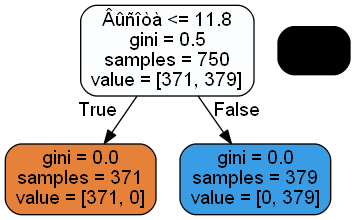

In [12]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png())  

Get score:

In [13]:
data = pd.read_json('dataset_209691_15.txt')

In [14]:
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,24,28.8,1,1,0
1,15,18.0,1,1,0
2,24,28.8,1,1,0
3,24,28.8,1,0,0
4,20,24.0,1,1,0


Get answer for number of dogs

In [15]:
pr = model.predict(data)
a = [1 if i=='собачка' else 0 for i in pr]
sum(a)

57